### Project 3: Scikitlearn Logistic Regression
#### Montgomery College DATA201 Spring 2019  [Steve Dutky](sdutky@gmail.com)
The third project is on Logistic Regression
 The target/label variable is discrete/qualitative and could be binary or multi-class. Choose a suitable dataset. The main goal of this project is to use the Scikitlearn Logisitic Regression, split the data into training and testing data, check the accuracy (confusion matrix / AuC).

### Where murders go unsolved:

From an investigation of unsolved murders appearing in the Washington Post on June 6, 2018.

The Washington Post compiled up to a decade of homicide arrest data from 50 of America’s largest cities.

The Post mapped and analyzed the data to identify the homicides that most often led to an arrest and those that did not.

Homicide arrest rates were calculated by victim’s race, age, gender and location. The Post’s data, which provides a level of specificity lacking in the homicide data released annually by the FBI, is being released publicly and will be expanded over 2018.

[article](https://www.washingtonpost.com/graphics/2018/investigations/where-murders-go-unsolved/?utm_term=.f1f4fb421d93)
[data](https://github.com/washingtonpost/data-homicides/raw/master/homicide-data.csv)
[maps](https://www.washingtonpost.com/graphics/2018/investigations/unsolved-homicide-database/)

## This project's intent is to use a Logistic Regression model to predict when no arrest is made for a homicide case.

#### The data in each observation:

* <B>uid</B>
    unique identifier formed from a city abbreviation and integer
* <B>reported_date</B>
    a numeric date in the form (mostly) YYYYMMDD
* <B>victim_last</B>
    string last name ignored here
* <B>victim_first</B>
    string first name ignored here
* <B>victim_race</B>
    string category
* <B>victim_age</B>
    string category
* <B>victim_sex</B>
    string category
* <B>city</B>
    string city full name
* <B>state</B>
    string state abbreviation
* <B>lat</B>
    float victim location latitude in decimal degrees
* <B>lon</B>
    float victim location lattitude in decimal degrees
* <B>disposition</B>
    string category:
        "Closed by arrest"
        "Closed without arrest"  exceptional circumstance is. suspect died
        "Open/No arrest"

#### There are 52,179 cases with 60 NA's in latitude and longitude

#### python/jupyter initialization:

In [109]:
## import packages:
import random # library of function for generating random numbers and samples
import numpy as np # for vector operations
import pandas as pd # for Data Frame methods
import matplotlib.pyplot as plt # Two dimensional plotting library
import seaborn as sns
from scipy import stats #  library of statistical functions
import sklearn #

#
# Set seed for generating psuedo random numbers
np.random.seed(12345678)
#
# Set up graphics
plt.style.use('classic')
%matplotlib notebook
%matplotlib notebook

### Get csv from Washington Post's github site

In [110]:

murder=pd.read_csv("https://github.com/washingtonpost/data-homicides/raw/master/homicide-data.csv",encoding='latin1')

murder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52179 entries, 0 to 52178
Data columns (total 12 columns):
uid              52179 non-null object
reported_date    52179 non-null int64
victim_last      52178 non-null object
victim_first     52179 non-null object
victim_race      52179 non-null object
victim_age       52179 non-null object
victim_sex       52179 non-null object
city             52179 non-null object
state            52179 non-null object
lat              52119 non-null float64
lon              52119 non-null float64
disposition      52179 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 4.8+ MB


### Drop 60 nan's in Longitude and Latitude

In [111]:
murder.dropna(inplace=True)
murder.index=[i for i in range(murder.shape[0])]
murder.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 52118 entries, 0 to 52117
Data columns (total 12 columns):
uid              52118 non-null object
reported_date    52118 non-null int64
victim_last      52118 non-null object
victim_first     52118 non-null object
victim_race      52118 non-null object
victim_age       52118 non-null object
victim_sex       52118 non-null object
city             52118 non-null object
state            52118 non-null object
lat              52118 non-null float64
lon              52118 non-null float64
disposition      52118 non-null object
dtypes: float64(2), int64(1), object(9)
memory usage: 5.2+ MB


### Note reported_date in 20,151

In [112]:
print(murder.describe().T)

                 count          mean           std           min  \
reported_date  52118.0  2.013091e+07  1.124076e+06  2.007010e+07   
lat            52118.0  3.702673e+01  4.348670e+00  2.572521e+01   
lon            52118.0 -9.147126e+01  1.374646e+01 -1.225078e+02   

                        25%           50%           75%           max  
reported_date  2.010032e+07  2.012122e+07  2.015091e+07  2.015111e+08  
lat            3.376518e+01  3.852491e+01  4.002763e+01  4.505119e+01  
lon           -9.599721e+01 -8.771029e+01 -8.175569e+01 -7.101152e+01  


### Rename columns for my convenience

In [113]:
murder.columns=['uid', 'date', 'victim_last', 'victim_first', 'race',
       'age', 'sex', 'city', 'state', 'lat', 'lon',
       'disposition']
murder.columns

Index(['uid', 'date', 'victim_last', 'victim_first', 'race', 'age', 'sex',
       'city', 'state', 'lat', 'lon', 'disposition'],
      dtype='object')

### Plot murder locations on U.S. map, transparent green circles and red stars for no arrests

<IPython.core.display.Javascript object>


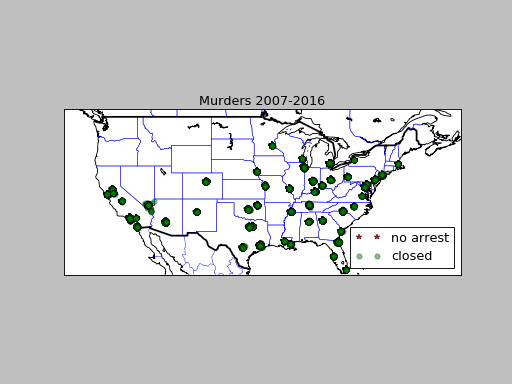

In [114]:
from mpl_toolkits.basemap import Basemap

m=Basemap(projection='mill',llcrnrlat=25,llcrnrlon=-130,urcrnrlat=50,urcrnrlon=-60,resolution='l')
m.drawcoastlines()
m.drawcountries(linewidth=2)
m.drawstates(color='b')



pts=[ m(murder.lon[i],murder.lat[i]) for i in range(murder.shape[0]) if murder.disposition[i]=='Open/No arrest' ]
xs=[ pts[i][0] for i in range(len(pts))]
ys=[ pts[i][1] for i in range(len(pts))]
    
m.plot(xs,ys,'r*',label='no arrest')

pts=[ m(murder.lon[i],murder.lat[i]) for i in range(murder.shape[0]) if murder.disposition[i]!='Open/No arrest' ]
xs=[ pts[i][0] for i in range(len(pts))]
ys=[ pts[i][1] for i in range(len(pts))]
    
m.plot(xs,ys,'go', alpha=.5,label='closed')


plt.title("Murders 2007-2016")
plt.legend(loc=4)
plt.show()

### See variety and distribution of categroical data

In [115]:
print(murder['disposition'].value_counts(),"\n\n",
      murder['race'].value_counts(),"\n\n",
      murder['sex'].value_counts(),"\n\n",
    )

Closed by arrest         25647
Open/No arrest           23556
Closed without arrest     2915
Name: disposition, dtype: int64 

 Black       33332
Hispanic     6888
White        6319
Unknown      4198
Other         698
Asian         683
Name: race, dtype: int64 

 Male       40696
Female      7192
Unknown     4230
Name: sex, dtype: int64 




In [116]:
a=pd.DataFrame()
a['allMurders']=murder['city'].value_counts()
a['noArrest']=0
for i in range(murder.shape[0]):
    if murder.disposition[i]=='Open/No arrest':
            a.loc[murder.city[i],'noArrest']+=1

a['noArrestRate']=a.noArrest/a.allMurders

print(a)

                allMurders  noArrest  noArrestRate
Chicago               5535      3686      0.665944
Philadelphia          3036      1267      0.417325
Houston               2933      1143      0.389703
Baltimore             2827      1673      0.591793
Detroit               2519      1466      0.581977
Los Angeles           2257      1106      0.490031
St. Louis             1672       862      0.515550
Dallas                1567       676      0.431398
Memphis               1514       433      0.285997
New Orleans           1434       832      0.580195
Las Vegas             1371       392      0.285923
Washington            1345       515      0.382900
Indianapolis          1322       492      0.372163
Kansas City           1190       450      0.378151
Jacksonville          1168       456      0.390411
Milwaukee             1115       366      0.328251
Columbus              1078       494      0.458256
Atlanta                973       315      0.323741
Oakland                947     

### Begin cleaning: map Open/No arrest to 1, closed to 0

In [117]:
df=murder[['age','city','state','sex']].copy()

df['noArrest']=[int(murder.disposition[i] == 'Open/No arrest') for i in range(murder.shape[0])]




### Clean dates using strftime exceptions to locate invalid dates

In [118]:

a=['%d' % murder.date[i] for i in range(murder.shape[0]) ]
a[33547]='20151118'
a[33550]='20151105'

print('murder.date[33547]=',murder.date[33547],'\n')
print('murder.date[33550]=',murder.date[33550],'\n')

import time
# use try-catch to identify invalid dates
try: 
    for i in range(murder.shape[0]):
        [ time.strftime("%A", time.strptime(a[i],"%Y%m%d")) ]
        [ time.strftime("%b", time.strptime(a[i], "%Y%m%d")) ]
        
except ValueError as e:
    # e = sys.exc_info()[0]
    print( 'exception ', e.args)
    print(i,a[i])
    
df['day']=[ time.strftime("%A", time.strptime(a[i], "%Y%m%d")) for i in range(murder.shape[0]) ]
df['month']=[ time.strftime("%b", time.strptime(a[i], "%Y%m%d")) for i in range(murder.shape[0]) ]


murder.date[33547]= 201511018 

murder.date[33550]= 201511105 



### Collapse latitude and longitude to zones of  2.5 mile centers

In [119]:
# There are approx 69 miles per degree of longitude or latitude.
# We're going to recenter the geolocations to the nearest 2.5 mile circle:
lon=['%.4f' % (int(murder.lon[i]*1000*2.5/69)/1000*69/2.5) for i in range(murder.shape[0])]
lat=['%.4f' % (int(murder.lat[i]*1000*2.5/69)/1000*69/2.5) for i in range(murder.shape[0])]

df['zone']=[ lon[i]+'/'+lat[i] for i in range(murder.shape[0])]


In [120]:
df['race']=murder.race

### Binary encode categories for zone, day, month and age
### dummy encode race and sex

In [121]:
import category_encoders as ce
encoder = ce.BinaryEncoder(cols=['zone','day','month','age'])
dfCoded = encoder.fit_transform(df)
dfCoded.drop(columns=['zone_0','day_0','month_0','age_0'],inplace=True)
dfCoded=pd.get_dummies(dfCoded,columns=['race','sex'])
print(dfCoded.describe().T)

                 count      mean       std  min  25%  50%  75%  max
zone_1         52118.0  0.325511  0.468570  0.0  0.0  0.0  1.0  1.0
zone_2         52118.0  0.298112  0.457433  0.0  0.0  0.0  1.0  1.0
zone_3         52118.0  0.413485  0.492463  0.0  0.0  0.0  1.0  1.0
zone_4         52118.0  0.533347  0.498891  0.0  0.0  1.0  1.0  1.0
zone_5         52118.0  0.518170  0.499675  0.0  0.0  1.0  1.0  1.0
zone_6         52118.0  0.541982  0.498239  0.0  0.0  1.0  1.0  1.0
zone_7         52118.0  0.536744  0.498653  0.0  0.0  1.0  1.0  1.0
zone_8         52118.0  0.513796  0.499814  0.0  0.0  1.0  1.0  1.0
zone_9         52118.0  0.502936  0.499996  0.0  0.0  1.0  1.0  1.0
zone_10        52118.0  0.511033  0.499883  0.0  0.0  1.0  1.0  1.0
zone_11        52118.0  0.494263  0.499972  0.0  0.0  0.0  1.0  1.0
zone_12        52118.0  0.511148  0.499881  0.0  0.0  1.0  1.0  1.0
day_1          52118.0  0.570283  0.495040  0.0  0.0  1.0  1.0  1.0
day_2          52118.0  0.605933  0.488654  0.0 

### Split the encoded dataframe dfCoded into training and testing sets

In [122]:
from sklearn.model_selection import train_test_split

predictorColummns= [a for a in dfCoded.columns if a!='city' and a!='state' and a!='noArrest' ]
predictors=dfCoded[predictorColummns].copy()
target=dfCoded[["noArrest"]].copy()
Xtrain, Xtest, yTrain, yTest = train_test_split( predictors, target, test_size=0.25, random_state=9)

### Fit the logisitic model to the training set

In [123]:
from sklearn.linear_model import LogisticRegression
logistic = LogisticRegression(solver='lbfgs')
logistic.fit(Xtrain,np.ravel(yTrain))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

### Determine the accuracy of the logistic model

score(X, y, sample_weight=None) method of sklearn.linear_model.logistic.LogisticRegression instance
    Returns the mean accuracy on the given test data and labels.
    
    In multi-label classification, this is the subset accuracy
    which is a harsh metric since you require for each sample that
    each label set be correctly predicted.
    
    Parameters
    ----------
    X : array-like, shape = (n_samples, n_features)
        Test samples.
    
    y : array-like, shape = (n_samples) or (n_samples, n_outputs)
        True labels for X.
    
    sample_weight : array-like, shape = [n_samples], optional
        Sample weights.
    
    Returns
    -------
    score : float
        Mean accuracy of self.predict(X) wrt. y.

In [124]:
print(logistic.score(Xtest, np.ravel(yTest) ))

0.5943207981580967


### Produce the confusion matrix
Help on function confusion_matrix in module sklearn.metrics.classification:

confusion_matrix(y_true, y_pred, labels=None, sample_weight=None)
    Compute confusion matrix to evaluate the accuracy of a classification
    
    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` but
    predicted to be in group :math:`j`.
    
    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.
    
    Read more in the :ref:`User Guide <confusion_matrix>`.
    
    Parameters
    ----------
    y_true : array, shape = [n_samples]
        Ground truth (correct) target values.
    
    y_pred : array, shape = [n_samples]
        Estimated targets as returned by a classifier.

In [125]:
from sklearn.metrics import confusion_matrix
a=pd.DataFrame(confusion_matrix(yTest, logistic.predict(Xtest)))
a.columns=['actual closed','actual no arrest']
a.index=['predicted closed','prediced no arrest']
print(a.T)

                  predicted closed  prediced no arrest
actual closed                 4841                2960
actual no arrest              2326                2903


### Classification Thresholds - calculated probabilities from sklearn.linear_model.logistic:

Help on method predict_proba in module sklearn.linear_model.logistic:

predict_proba(X) method of sklearn.linear_model.logistic.LogisticRegression instance
    Probability estimates.
    
    The returned estimates for all classes are ordered by the
    label of classes.
    
    For a multi_class problem, if multi_class is set to be "multinomial"
    the softmax function is used to find the predicted probability of
    each class.
    Else use a one-vs-rest approach, i.e calculate the probability
    of each class assuming it to be positive using the logistic function.
    and normalize these values across all the classes.
    
    Parameters
    ----------
    X : array-like, shape = [n_samples, n_features]
    
    Returns
    -------
    T : array-like, shape = [n_samples, n_classes]
        Returns the probability of the sample for each class in the model,
        where classes are ordered as they are in ``self.classes_``.

<IPython.core.display.Javascript object>


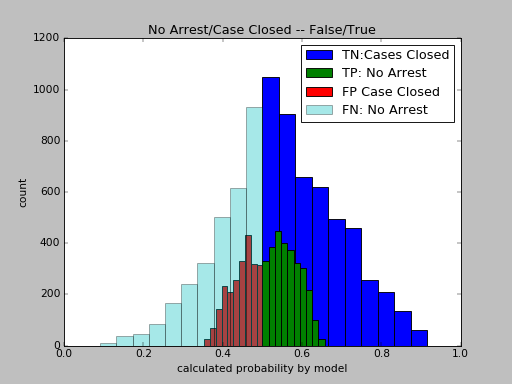

In [126]:
a=logistic.predict_proba(Xtest)

dProbs=pd.DataFrame({'yTest':yTest.noArrest,
                     'yPred':logistic.predict(Xtest),
                     'pNoArrest':a[:,1],
                     'pClosed':a[:,0]})

plt.figure()
plt.title('No Arrest/Case Closed -- False/True')
plt.xlabel('calculated probability by model')
plt.ylabel('count')

d=dProbs[list(dProbs.yTest==dProbs.yPred)].copy()
plt.hist(d.pClosed[list(d.yTest==0)],label='TN:Cases Closed',alpha=1)
plt.hist(d.pNoArrest[list(d.yTest==1)],label='TP: No Arrest',alpha=1)

d=dProbs[list(dProbs.yTest!=dProbs.yPred)].copy()
plt.hist(d.pClosed[list(d.yTest==0)],label='FP Case Closed',alpha=1)
plt.hist(d.pNoArrest[list(d.yTest==1)],label='FN: No Arrest',alpha=.35)

plt.legend(loc=1)

plt.show()

### Print the feature coefficients

In [127]:
print(pd.DataFrame({'features':Xtrain.columns,'coefficients':np.ravel(logistic.coef_)}))


         features  coefficients
0          zone_1     -0.249203
1          zone_2     -0.412047
2          zone_3     -0.085431
3          zone_4      0.083795
4          zone_5      0.018845
5          zone_6      0.087189
6          zone_7      0.070162
7          zone_8      0.034646
8          zone_9     -0.002672
9         zone_10     -0.015463
10        zone_11      0.005089
11        zone_12     -0.014310
12          day_1      0.020860
13          day_2      0.030164
14          day_3      0.020033
15        month_1      0.256262
16        month_2      0.077035
17        month_3      0.044092
18        month_4      0.045878
19          age_1     -0.354991
20          age_2      0.021312
21          age_3     -0.002670
22          age_4      0.021076
23          age_5      0.004879
24          age_6     -0.035026
25          age_7     -0.004528
26     race_Asian     -0.501701
27     race_Black      0.158151
28  race_Hispanic      0.100274
29     race_Other      0.060320
30   rac

## See which set of features produce better scores
### 1. map features to encoded columns

In [128]:
cols={ 'zone':['zone_1', 'zone_2', 'zone_3', 'zone_4', 'zone_5', 'zone_6', 'zone_7', 'zone_8', 'zone_9', 'zone_10', 'zone_11', 'zone_12'], 'day':['day_1', 'day_2', 'day_3'],'month':[ 'month_1', 'month_2', 'month_3', 'month_4'], 'age':['age_1', 'age_2', 'age_3', 'age_4', 'age_5', 'age_6', 'age_7'], 'sex':['sex_Male','sex_Female','sex_Unknown'], 'race':['race_Asian', 'race_Black', 'race_Hispanic', 'race_Other', 'race_Unknown', 'race_White'] }
keys=list(cols.keys())
keys

['zone', 'day', 'month', 'age', 'sex', 'race']

### 2. generate all combinations of features and formulae

In [129]:
import itertools

featureSet=list()
formulas=list()
for count in range(1, len(keys)+1):
    for combo in itertools.combinations(keys,count):
        a=list(combo)
        b=list()
        c='noArrest~'
        for i in range(len(a)):
            b+=cols[a[i]]
            c='%s%s+' % (c,a[i])
        featureSet.append(b)
        formulas.append(c[:-1])

best=pd.DataFrame({'formula':formulas,'scoreTrain':0,'scoreTest':0,'set':list(range(len(featureSet)))})
        

### 3. use the training set to fit a logistic model to each combination of features and collect the score of each for the training and test sets

In [130]:
scoreTrain=list()
scoreTest=list()

for i in range(best.shape[0]):
    
    logistic.fit(Xtrain[featureSet[i]],np.ravel(yTrain))
    scoreTest+=[logistic.score(Xtest[featureSet[i]], np.ravel(yTest) )]
    scoreTrain+=[logistic.score(Xtrain[featureSet[i]], np.ravel(yTrain) )]
    
best.scoreTest=scoreTest
best.scoreTrain=scoreTrain
    

### See which formulae score best

In [131]:
best.sort_values(by='scoreTrain',ascending=False)

,formula,scoreTrain,scoreTest,set
60,noArrest~zone+month+age+sex+race,0.599647,0.594551,60
62,noArrest~zone+day+month+age+sex+race,0.599186,0.594321,62
50,noArrest~zone+age+sex+race,0.598879,0.596393,50
49,noArrest~zone+month+sex+race,0.598445,0.589256,49
59,noArrest~zone+day+age+sex+race,0.598138,0.594474,59
58,noArrest~zone+day+month+sex+race,0.597344,0.590944,58
46,noArrest~zone+day+sex+race,0.596935,0.593093,46
30,noArrest~zone+sex+race,0.596705,0.592556,30
47,noArrest~zone+month+age+sex,0.591077,0.585955,47
56,noArrest~zone+day+month+age+sex,0.590949,0.587874,56


from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(2):
    fpr[i], tpr[i], _ = roc_curve(yTest, logistic.predict(Xtest))
    roc_auc[i] = auc(fpr[i], tpr[i])

#Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])